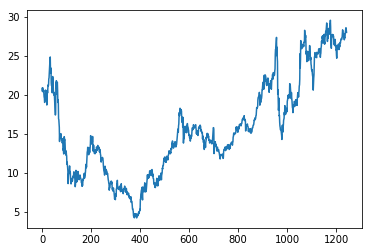

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

#data = pd.read_csv("petr4.csv")
data = pd.read_csv("PETR4.SA.csv")
data = data.dropna()
data = data.iloc[:,1].values
plt.plot(data)

In [3]:
len(data)
data[-1]

27.99

In [0]:
periods = 30 # days

In [0]:
# separate the records from stock prices excluding the latest 30 days (test data)
train_x = data[0:(len(data) - (len(data) % periods))]

train_x_batches = train_x.reshape(-1, periods, 1)  
# Uses 1 because it's only one independent feature
# created 41 batches with 30 records with 1 feature

# Using stock price for the "next day" of each 30 days batch as the dependent variable.
train_y = data[1:(len(data) - (len(data) % periods)) + 1] # increment 1 to get the "next day"
train_y_batches = train_y.reshape(-1, periods, 1)

print('train_x shape: ', train_x.shape)
print('train_y shape: ', train_y.shape)

print('train_x_batches shape: ', train_x_batches.shape)
print('train_y_batches shape: ', train_y_batches.shape)

In [6]:
test_x = data[-(periods + 1):]
test_x = test_x[:periods]
test_x = test_x.reshape(-1, periods, 1)
print('test_x shape: ', test_x.shape)

test_y = data[-(periods):]
test_y = test_y.reshape(-1, periods, 1)
print('test_y shape: ', test_y.shape)

test_x shape:  (1, 30, 1)
test_y shape:  (1, 30, 1)


In [0]:
import tensorflow as tf
tf.reset_default_graph() # memory clean

In [8]:
neurons_input = 1 # it's just one independent variable (feature)
neurons_hidden = 100
neurons_output = 1 # it's just one dependent variable

xph = tf.placeholder(tf.float32, [None, periods, neurons_input])
yph = tf.placeholder(tf.float32, [None, periods, neurons_output])

cell = tf.contrib.rnn.BasicRNNCell(num_units = neurons_hidden, activation = tf.nn.relu)

cell_output = tf.contrib.rnn.OutputProjectionWrapper(cell, output_size=1) # Dense Neural Network

rnn_output, _ = tf.nn.dynamic_rnn(cell_output, xph, dtype=tf.float32)

error = tf.losses.mean_squared_error(labels=yph, predictions=rnn_output)

optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, whic

In [9]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    
    for epoch in range(1000):
        _, cost = s.run([train, error], feed_dict = { xph: train_x_batches, yph: train_y_batches })
        if epoch % 100 == 0:
            print('Epoch: ', epoch + 1, ' - Cost error: ', cost)
            
    
    predictions = s.run(rnn_output, feed_dict = { xph: test_x })
    #predict_2 = s.run(rnn_output, feed_dict = { xph: [27.72] })

Epoch:  1  - Cost error:  250.24936
Epoch:  101  - Cost error:  2.9109569
Epoch:  201  - Cost error:  0.61957246
Epoch:  301  - Cost error:  0.30159092
Epoch:  401  - Cost error:  0.28584045
Epoch:  501  - Cost error:  0.2797279
Epoch:  601  - Cost error:  0.274238
Epoch:  701  - Cost error:  0.2692624
Epoch:  801  - Cost error:  0.26448792
Epoch:  901  - Cost error:  0.25940007


In [0]:
import numpy as np
check_y = np.ravel(test_y) # reduction (1,30,1) to (30,)
check_predictions = np.ravel(predictions)

In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(check_y, check_predictions)
mae
# we got an error of just 16 cents ($0.16) into prices

0.2763881945841469

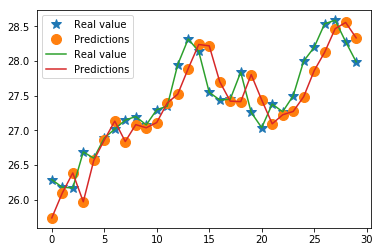

In [12]:
plt.plot(check_y, '*', markersize=10, label = 'Real value')
plt.plot(check_predictions, 'o', markersize=10, label = 'Predictions')
plt.legend()

plt.plot(check_y, label = 'Real value')
plt.plot(check_predictions, label = 'Predictions')
plt.legend()

In [13]:
check_y[-1]

27.99

In [14]:
check_predictions[-1]

28.335396